# METIS Intro to Data Science Project

## By: Ben McGauhey

### Seattle, WA Fall-2017

# Exploratory Data Analysis
We will start by simply loading our dataframe from the pickle file we saved it as earlier, then we will explore some of the relationships between variables and create some visualizations to better understand the data.

In [1]:
import pandas as pd
import numpy as np          # As Always we import our libraries
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
%matplotlib inline

In [2]:
df = pd.read_pickle('Data/weatherAndCallData.pkl') # Get our dataframe up and running from our saved file

# Let's start by looking at the correlation matrix to see if anything stands out to us

In [20]:
pd.set_option('display.max_columns', 200) # Set our options so we can see more
pd.set_option('display.max_row', 50)

In [27]:
df.corr()

,longitude,latitude,homicide,robbery,assault,burglary,theft,car_theft,reckless_burning,fraud,vice,property,lewd_behavior,trespass,park_violation,liquor_violation,drive_by_shooting,narcotics,warrant_service,security_alarms,mental_health,disturbance,animals,suspicious_case,person_with_weapon,harbor_theft,casualty,harbor_boat_assist,harbor_dui,hazards,missing_person,missing_property,crowd_control,traffic_general,dui,traffic_minor,human_trafficking,99,b1,b2,b3,bs,c1,c2,c3,ccd,comm,cs,cty,d1,d2,d3,det,ds,e,e1,e2,e3,ep,es,f1,f2,f3,fs,g1,g2,g3,gs,h2,h3,inv,j1,j2,j3,js,k1,k2,k3,kcio07,ks,l1,l2,l3,lapt,ls,m1,m2,m3,ms,n,n1,n2,n3,np,ns,o1,o2,o3,os,q1,q2,q3,qs,r1,r2,r3,rs,s,s1,s2,s3,sctr1,sp,ss,tac3,trf,u1,u2,u3,us,w,w1,w2,w3,wp,ws,temp,pressure,humidity,wind_speed,wind_deg,rain_today,clouds_all,sky_is_clear,broken_clouds,drizzle,few_clouds,fog,haze,heavy_intensity_rain,heavy_intensity_shower_rain,heavy_snow,light_intensity_drizzle,light_intensity_shower_rain,light_rain,light_snow,mist,moderate_rain,overcast_clouds,proximity_thunderstorm,scattered_clouds,shower_rain,sky_is_clear,smoke,snow,thunderstorm,very_heavy_rain
longitude,1.000000,-0.141098,0.003552,0.013271,0.008909,0.002103,-0.010674,0.009258,-0.004282,-0.002130,-0.003359,-0.000002,0.007902,0.007147,-0.047252,-0.000645,0.023564,-0.008531,0.008195,0.014838,0.002289,-0.011811,-0.003683,-0.006644,0.011751,-0.000643,-0.008764,0.002337,0.000097,-0.011297,0.005024,-0.000990,0.001476,0.007836,-0.008807,0.012674,-0.000350,0.020173,-0.253852,-0.163573,-0.051651,-0.002885,0.065095,0.105482,0.142429,-0.000864,-0.000266,0.001448,0.001851,-0.078911,-0.037622,0.003916,0.001906,-0.001473,0.002316,0.045208,0.075200,0.032551,0.001979,0.001143,-0.115236,-0.140282,-0.013311,-0.001782,0.057515,0.115040,0.118111,0.001114,0.000623,0.003239,-0.000797,-1.151021e-01,-0.177518,-0.029138,-0.001042,-0.017055,0.000844,0.014340,-0.000220,-0.000653,0.118303,0.062406,0.179357,0.003093,0.002766,-0.060593,-0.037792,-0.039001,-0.002145,-0.000072,-0.091910,-0.054122,-0.045810,-0.000868,-0.000953,0.020222,0.006181,0.047009,0.001233,-0.237932,-0.146443,-0.123495,-0.001543,0.116373,0.169368,0.247910,0.003837,0.003530,0.172506,2.552597e-01,0.284511,-0.001213,-0.000322,0.006934,-0.000283,-0.002322,0.103614,0.087622,0.191296,0.000678,-0.003511,-0.276763,-0.238598,-0.202460,-0.001607,-0.003353,0.000716,-0.000896,-0.002536,0.001160,-0.001523,-0.000034,0.000022,0.000285,-0.001338,-0.002314,-0.001214,-0.001156,0.000559,0.001444,0.000808,-0.000574,-0.000421,-0.002326,-0.002408,0.000274,0.000036,-0.001875,0.001894,0.001155,0.004563,0.001589,0.000285,-0.001096,0.001220,0.001282,-0.000060
latitude,-0.141098,1.000000,-0.005796,-0.008627,-0.003687,0.029933,0.014951,0.001460,-0.002544,0.016935,0.038281,-0.003063,-0.006287,0.010884,-0.016513,-0.063123,-0.021086,-0.003798,-0.003690,-0.007425,0.005715,0.008796,-0.005314,0.030993,-0.011426,-0.000049,0.001731,0.007248,0.001467,-0.001782,-0.001961,0.010172,-0.001490,-0.012728,0.010469,-0.023051,-0.000203,-0.031404,0.157726,0.120712,0.117556,0.002047,0.019026,0.010928,-0.001762,0.000119,0.000447,-0.000447,0.001616,-0.010622,0.004304,0.006721,-0.001240,-0.001551,-0.001156,-0.000210,-0.021684,-0.029211,-0.000617,-0.000070,-0.170845,-0.232218,-0.216672,-0.004457,-0.035264,-0.041943,-0.054810,-0.000627,0.001039,-0.000866,0.000198,1.643772e-01,0.136501,0.141220,0.001722,-0.045315,-0.064833,-0.076952,-0.000185,-0.001570,0.255176,0.216004,0.216010,-0.000543,0.003925,-0.030293,-0.026547,-0.036771,-0.001383,0.003752,0.228400,0.242463,0.253678,0.000710,0.004569,-0.093751,-0.122214,-0.149206,-0.003252,0.060899,0.054162,0.010104,0.000558,-0.114182,-0.124184,-0.168150,-0.002690,-0.007574,-0.180434,-2.157319e-01,-0.247339,0.000061,-0.001711,-0.006516,-0.000255,-0.000725,0.153469,0.118689,0.136508,0.002308,-0.001598,-0.115219,-0.148321,-0.193060,-0.001958,-0.005597,-0.002987,0.001401,0.005028,-0.001331,-0.000942,-0.000942,0.002473,-0.003016,-0.000084,-0.002180,-0.000219,0.001834,0.000770,-0.001140,-0.000

### Whew! That is way too much to take in at once. Let's break it down by the variables that we really care about seeing against each other.
Since pandas isn't great at creating correlation matrices on specific columns against a list of others, we will simply create a couple lists of what we care about seeing against each other, then loop through them and store the pairwise correlations in a dictionary, then create a dataframe from the key value pairs. It's a bit more work, but works well to give us a correlation matrix of any dimensions we choose.

In [28]:
list_1 = df.columns[3:39] # Create a list of the crime columns
list_2 = df.columns[-31:] # Create a list of the weather columns
plotDict = {} # Create our empty dict for the plot

for crime in list_1:
    for weather in list_2:
        tempDict = {(crime, weather): scipy.stats.pearsonr(df[crime],df[weather])} # Create a temp dict with our 
        # Variables in a tuple as the key and their correlation as the value
        plotDict.update(tempDict) # Update our plot dict with the temp
        
dfOutput = pd.Series(plotDict).unstack() # Create a data frame from the plot dictionary
dfOutputPearson = dfOutput.apply(lambda x: x.apply(lambda x:x[0])) 
sns.heatmap(dfOutputPearson) # Plot it as a heatmap


ValueError: operands could not be broadcast together with shapes (878480,) (878480,2) 

# Uh oh... just when you think you're done cleaning data
let's see what is the issue here by inserting a print statement in our loop to create a log

In [29]:
list_1 = df.columns[3:39] # Create a list of the crime columns
list_2 = df.columns[-31:] # Create a list of the weather columns
plotDict = {} # Create our empty dict for the plot

for crime in list_1:
    for weather in list_2:
        print(crime, weather) # <<---- Our handy log generator or -v  option if you prefer
        tempDict = {(crime, weather): scipy.stats.pearsonr(df[crime],df[weather])} # Create a temp dict with our 
        # Variables in a tuple as the key and their correlation as the value
        plotDict.update(tempDict) # Update our plot dict with the temp
        
dfOutput = pd.Series(plotDict).unstack() # Create a data frame from the plot dictionary
dfOutputPearson = dfOutput.apply(lambda x: x.apply(lambda x:x[0])) 
sns.heatmap(dfOutputPearson) # Plot it as a heatmap


homicide temp
homicide pressure
homicide humidity
homicide wind_speed
homicide wind_deg
homicide rain_today
homicide clouds_all
homicide sky_is_clear


ValueError: operands could not be broadcast together with shapes (878480,) (878480,2) 

In [32]:
print(df.sky_is_clear.shape) # Let's verify it's sky is clear

(878480, 2)


## Okay, let's just fix this real quick by looking at them and seeing if there's any difference

In [70]:
col1 = df.sky_is_clear.iloc[:,0] # Set as a variable
col2 = df.sky_is_clear.iloc[:,1] # Set as a variable
print(col1.sum()) # Compare the sums to see if they differ, which we would doubt
print(col2.sum())


IndexingError: Too many indexers

In [44]:
df.drop(labels='sky_is_clear',axis=1, inplace=True) # Drop the old column

df['sky_is_clear'] = col1 # Replace with our variable for column 0 of the old sky is clear

df.sky_is_clear.shape # Check our work

(878480,)

In [69]:
for i in df.columns: # Check our work and see if there are any others
    print(df[i].shape)

(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)
(878480,)


## There! That looks much better, let's try that again and see what kind of correlation there is between the weather and call type

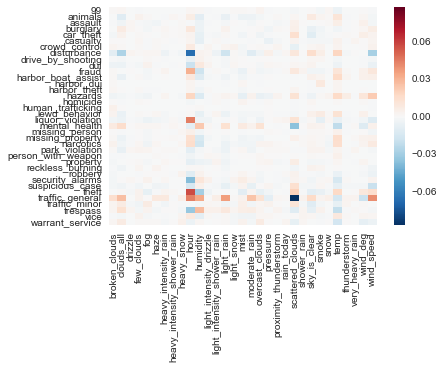

In [100]:
list_1 = df.columns[3:39] # Create a list of the crime columns
list_2 = df.columns[-31:] # Create a list of the weather columns
plotDict = {} # Create our empty dict for the plot

for crime in list_1:
    for weather in list_2:
        tempDict = {(crime, weather): scipy.stats.pearsonr(df[crime],df[weather])} # Create a temp dict with our 
        # Variables in a tuple as the key and their correlation as the value
        plotDict.update(tempDict) # Update our plot dict with the temp
        
dfOutput = pd.Series(plotDict).unstack() # Create a data frame from the plot dictionary
dfOutputPearson = dfOutput.apply(lambda x: x.apply(lambda x:x[0])) 
sns.heatmap(dfOutputPearson) # Plot it as a heatmap


# Well, we can definitely see some correlations here
especially between temperature, cloud cover, wind speed and humidity. Our most correlated call types appear to be traffic, mental health and disturbance. The call types seem to make sense, as it is harder to drive in inclimate weather and people are less likely to be out on the streets causing mischief in such weather as well. Humidity and temperature have the opposite correlations with the same call types, which is interesting. We know that humidity is highly correlated to the temperature, but the humidity shown here is already measured relative to temperature. This must mean that we are seeing the effect of precipitation, when humidity is 100% regardless of temperature. The precipitaion categories are divided by type, so they don't show as strong of an effect. We should be skeptical of this until we have proved it, although it is a promising lead. 
## Overall, we can certainly say that a pearson coefficient of only .06 is not a very strong effect. Let's look at location next. 
We will look at the zone/beat first.

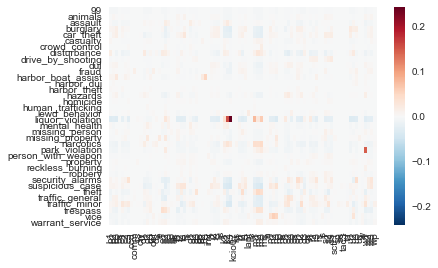

In [72]:
list_1 = df.columns[3:39] # Create a list of the crime columns
list_2 = df.columns[39:-31] # Create a list of the weather columns
plotDict = {} # Create our empty dict for the plot

for crime in list_1:
    for weather in list_2:
        tempDict = {(crime, weather): scipy.stats.pearsonr(df[crime],df[weather])} # Create a temp dict with our 
        # Variables in a tuple as the key and their correlation and p value in a tuple as the value
        plotDict.update(tempDict) # Update our plot dict with the temp
        
dfOutput = pd.Series(plotDict).unstack() # Create a data frame from the plot dictionary
dfOutputPearson = dfOutput.apply(lambda x: x.apply(lambda x:x[0])) # Grab just the correlations from the new dataframe
sns.heatmap(dfOutputPearson) # Plot it as a heatmap


## Well, it appear that aside from a certain part of town not being able to handle their liquor, we still have fairly weak correlations with location. 
This is very surprising to say the least. When we think of crime or disturbances, we think of "Across the tracks" or the "Bad part of town", and that doesn't seem to hold up in the call data by zone. We see stronger correlations than with the weather, but only roughly twice the effect. These are still pretty weak pearson coefficients. There are a few things to consider of course, one is that the zones may be designed to spread the workload evenly amongst them, meaning that they are designed to have an even distribution of events. The other is that this is only call data, and the "Bad part" of town likely has more incidents which bypass the 911 call system and are directly responded to by a heavier police presence. We don't have the actual crime data here, we are using call data as a proxy, which may lead to some biases. 

The highest correlations appear to be with general suspicious activities such as alarm system calls, trespass, suspicious case and disturbance. The two highest correlations, which appear to be outliers, are liquor in two zones, and park violations in one. This would make sense if the zones with the highest number of liquor violations were around the stadiums for instance.  The park violation zone could contain greenlake or gasworks, a very popular and or sizeable park. We kind of expected to see more strong correlations than these two, maybe it is the zone distribution, let's look at the actual locations.

### We will view some of the events on a map, to try and see if we have any clustering the zone correlation isn't showing.

In [3]:
homicideDF = df[df.homicide == 1]
homicideDF = homicideDF.iloc[:,0:3]
locations = homicideDF[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)

93

In [4]:
map = folium.Map(location=[47.713253, -122.355515], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

## The other potential variable that we haven't looked at is the timing of events. 
Our data is broken down by the exact time of the call, but we really don't need the specific time, we are more interested in the time of day, or the time of the month. Let's do a little more feature engineering and create a time of day column and a day of the month column. Those two should provide the level of detail that we need to properly evaluate correlations.

In [81]:
df['hour'] = df.formatted_time.dt.hour # Create a column with the hour of the day
df['day'] = df.formatted_time.dt.day # Create a column with the day of the month

### Now that we have those features, let's use them to make some plots and take a look at how the time of day or day of the month affect our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1475baa20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x163384e80>]], dtype=object)

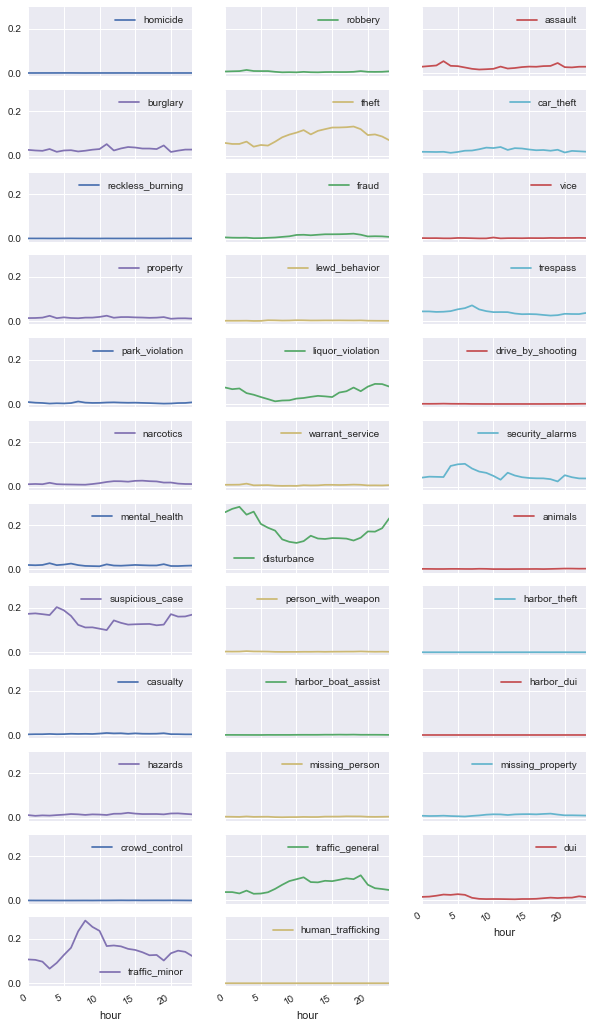

In [96]:
plotlist = df.columns[2:38]
df.groupby('hour')[plotlist].mean().plot(sharey=True, figsize=(10,20), layout=(12,3), subplots=True)

### We can see some interesting trends here, people definitely drive better on the way home than to work in the morning for one, 
Assaults peak at around 2 AM, not after school behind the gymnasium like when we were young. Lunch and dinner seem to be violent as well. DUI does peak in the early morning hours, but is a less pronounced spike than expected. Brunch seems to be a popular time for some trespassing, whereas lunch and dinner are more burglarific. In short, we see some definite patterns, but with very different peak times. Which if we are trying to predict a specific outcome, not just a call, is great news. Our previous supposition that the stadiums may be to blame for the liquor violations doesn't fare well, based on the lack of stadium events at 10pm. Which is why we are exploring our data, to start to form testable hypothesis, not to draw conclusions from charts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1638afcf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1647f00f0>]], dtype=object)

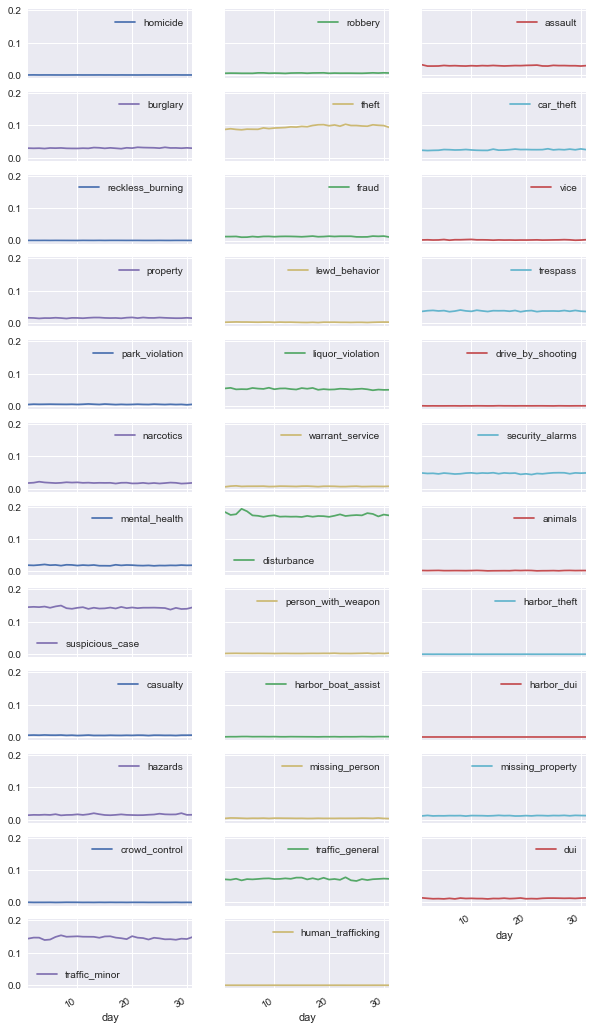

In [97]:
plotlist = df.columns[2:38]
df.groupby('day')[plotlist].mean().plot(sharey=True, figsize=(10,20), layout=(12,3), subplots=True)

### Well, aside from a slow increase in theft as the month progresses and a spike in disturbances around the end of the first week, we don't see much of a pattern here. 
It's safe to say that we can depend more upon the time of day than day of the month for our insights. We will drop this column. 

In [98]:
df.drop('day', axis=1, inplace=True) # ...Until the end of days...